In [2]:
%pylab inline
from scipy.fftpack import *
from scipy.io.wavfile import *

Populating the interactive namespace from numpy and matplotlib


Se busca tomar una señal y descomponerla en sus frecuencias fundamentales.

##Tratamiento de Archivos

In [3]:
#Algunas constantes que serán modificadas por las funciones.
t = []

In [157]:
#Nombre: Leer
#Parámetros: archivo- El nombre completo del archivo, junto con la extensión .wav.
#Parámetros: graficar- Booleano. De ser True, grafica los datos obtenidos del archivo importado.
#Este método importa un archivo escrito como .wav, para luego retornar un arreglo que contiene todos los datos
#contenidos en dicho archivo y la frecuencia de samplin del archivo .wav.
def leer(archivo):
    global t
    datosGeneral = read(archivo)
    original = datosGeneral[1]
    sampling = datosGeneral[0]
    return array([original, sampling])

In [158]:
#Nombre: Fourier
#Parámetros: archivo- El nombre del archivo generado por la función Leer.
#Parámetros: graficar- Booleano que, de ser True, permite a la función graficar la transformada de Fourier realizada
#Este método recibe un archivo que contiene los datos de un .wav y retorna un arreglo de dos elementos:
#el primero es la transformada discreta de Fourier y el segundo son las frecuencias asociadas.
def fourier(archivo):
    transformada = fft(archivo)
    N = len(archivo)
    dt = (archivo[-1] - archivo[0])/N
    frecuencias = fftfreq(N,dt)
    final = array([frecuencias, abs(transformada)])
    return final

In [159]:
#Nombre: Filtro
#Parámetros: transformada- Arreglo de datos correspondiente a la transformada de Fourier de un archivo
#de sonido.
#Parámetros: frecuencias- Arreglo de las frecuencias asociadas a esa misma transformada de Fourier.
#Esta función permite filtrar por la frecuencia máxima un arreglo en el dominio de la frecuencia, obtenido
#como la transformada de Fourier.
def filtro(transformada, frecuencias):
    global t
    transformada[frecuencias != max(frecuencias)] = 0 #El filtrado
    nuevos = ifft(transformada)
    return nuevos

##Pruebas

/Users/usuario/anaconda/lib/python3.4/site-packages/scipy/io/wavfile.py:172: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


44100

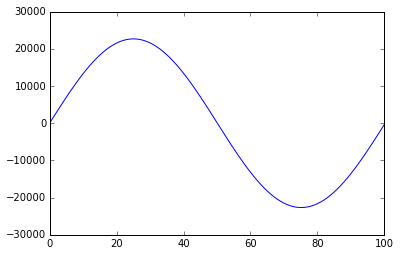

In [165]:
#Leer el archivo .wav
prueba1 = read("laPrueba.wav")
plot(prueba1[1])
xlim(0,100)
prueba1[0]

440.0


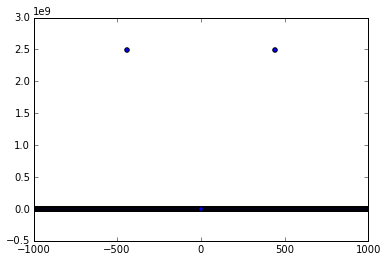

In [182]:
#prueba2 = fourier(prueba1)
#scatter(prueba2[0], prueba2[1])
#max(prueba2[0])
dt = 1/prueba1[0]

trans = fft(prueba1[1])
absolute = abs(trans)
maximo = max(absolute)
freq = fftfreq(N,dt)

scatter(freq, absolute)
xlim(-1000,1000)

for i in range(len(absolute)):
    if(absolute[i] == maximo):
        print(freq[i])
        break

In [172]:
trans[abs(freq) != max(freq)] = 0

Tomar el archivo importado y realizar la transformada de Fourier. Esto para dejar los datos en el dominio de la frecuencia y poder realizar el filtro. Luego de tenerlos así, se construirán los arreglos que permiten su visualización gráfica y análisis.

##Análisis de Fourier/Filtrado de Frecuencias

Para realizar el filtrado, visualizan primero las frecuencias contenidas en el archivo analizado.